# ***Airline Passenger Satisfaction — Business Context***
In the competitive airline industry, passenger satisfaction is a key driver of customer loyalty, repeat business, and brand reputation. Airlines need to understand what factors—such as in-flight services, delays, or booking experiences—most influence satisfaction to optimize operations and enhance customer experiences. This Exploratory Data Analysis (EDA) project uses passenger feedback data to uncover insights that can guide airlines in improving services, targeting specific customer segments, and strengthening loyalty programs.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Import Some libraries:***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# ***Load the Data***

In [3]:
df = pd.read_csv('/content/drive/MyDrive/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
df.shape

(129880, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0


In [7]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


<Axes: xlabel='Departure Delay'>

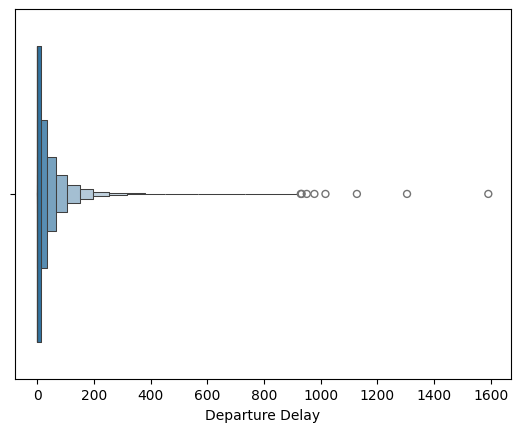

In [8]:
sns.boxenplot(x=df['Departure Delay'])

<Axes: xlabel='Arrival Delay'>

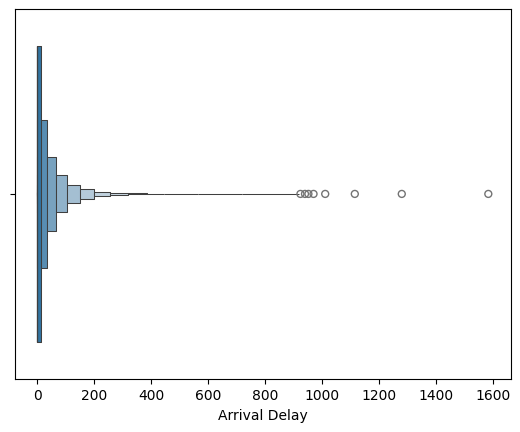

In [9]:
sns.boxenplot(x=df['Arrival Delay'])


# **Removing Outliers**


In [10]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [11]:
# Apply the function to remove outliers from 'Departure Delay' and 'Arrival Delay'
df = remove_outliers(df, ['Departure Delay', 'Arrival Delay'])

In [12]:
df[['Departure Delay', 'Arrival Delay']].describe()

,Departure Delay,Arrival Delay
count,96111.000000,96111.000000
mean,2.195441,1.380456
std,4.892985,2.953146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,30.000000,12.000000


# **Detect Missing Data**

In [13]:
print("\nNumber of Missing data:")
df.isnull().sum()


Number of Missing data:


,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


# **Duplicate data**

In [14]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


# **Rename columns**

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [16]:
df.columns.to_list()

['id',
 'gender',
 'age',
 'customer_type',
 'type_of_travel',
 'class',
 'flight_distance',
 'departure_delay',
 'arrival_delay',
 'departure_and_arrival_time_convenience',
 'ease_of_online_booking',
 'check-in_service',
 'online_boarding',
 'gate_location',
 'on-board_service',
 'seat_comfort',
 'leg_room_service',
 'cleanliness',
 'food_and_drink',
 'in-flight_service',
 'in-flight_wifi_service',
 'in-flight_entertainment',
 'baggage_handling',
 'satisfaction']

# **Overview data**

======gender======
gender
Female    48727
Male      47384
Name: count, dtype: int64


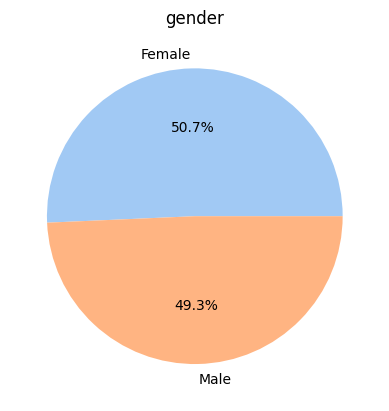

******************************
======customer_type======
customer_type
Returning     78658
First-time    17453
Name: count, dtype: int64


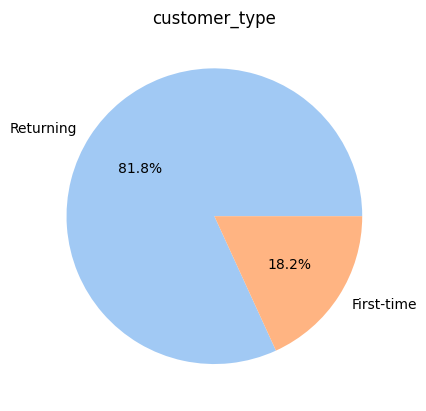

******************************
======type_of_travel======
type_of_travel
Business    66234
Personal    29877
Name: count, dtype: int64


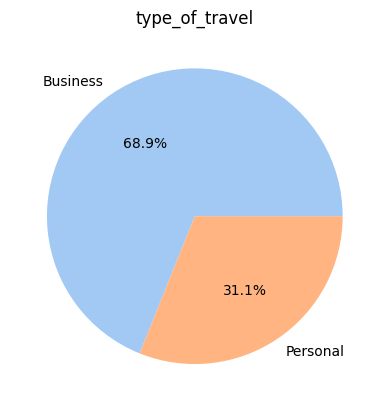

******************************
======class======
class
Business        46542
Economy         42753
Economy Plus     6816
Name: count, dtype: int64


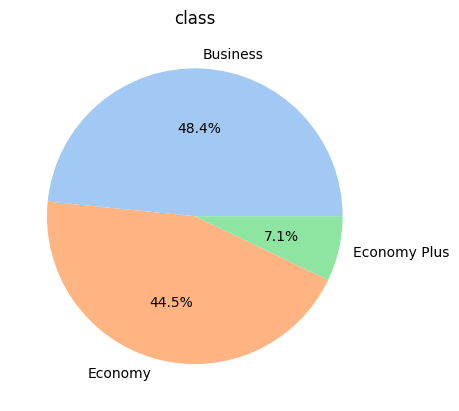

******************************
======satisfaction======
satisfaction
Neutral or Dissatisfied    51841
Satisfied                  44270
Name: count, dtype: int64


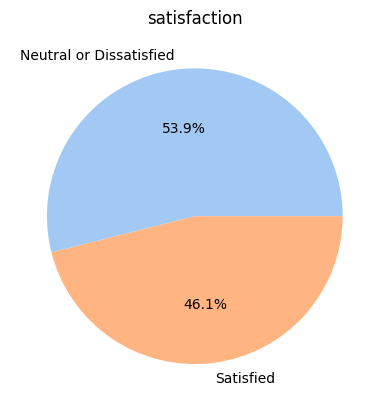

******************************


In [17]:
categorical_cols = df.select_dtypes(include='object').columns.to_list()
for col in categorical_cols:
    print(f"======{col}======")
    print(df[col].value_counts())
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(col)
    plt.show()
    print("*"*30)

In [97]:
service_cols = [
    'ease_of_online_booking','check-in_service','online_boarding','on-board_service',
    'seat_comfort','leg_room_service','cleanliness','food_and_drink',
    'in-flight_service','in-flight_wifi_service','in-flight_entertainment','baggage_handling'
]

======ease_of_online_booking======
ease_of_online_booking
3    22267
2    21945
4    18328
1    15997
5    13107
0     4467
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


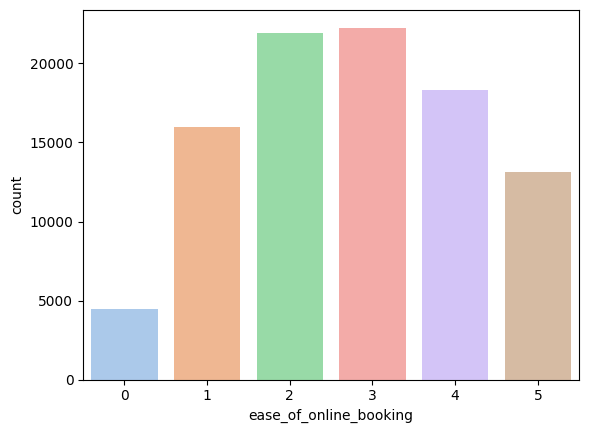

******************************
======check-in_service======
check-in_service
4    27018
3    26358
5    19702
1    11550
2    11483
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


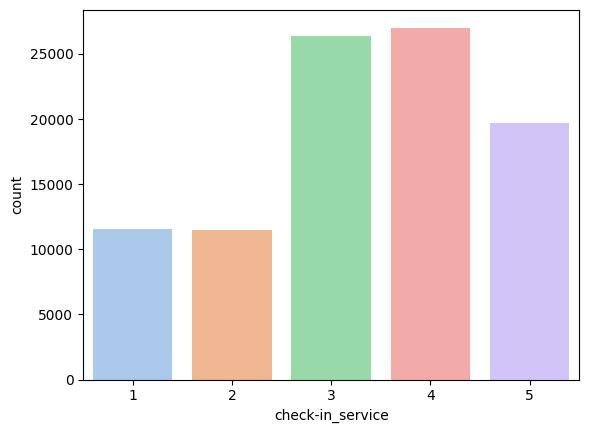

******************************
======online_boarding======
online_boarding
4    29175
5    19920
3    19562
2    15627
1     9357
0     2470
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


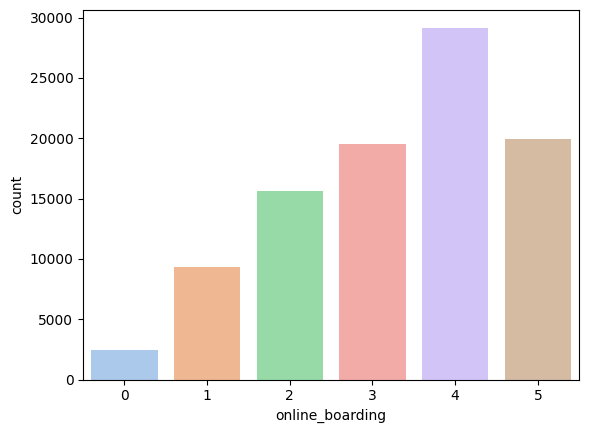

******************************
======on-board_service======
on-board_service
4    29132
5    22512
3    20848
2    12996
1    10618
0        5
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


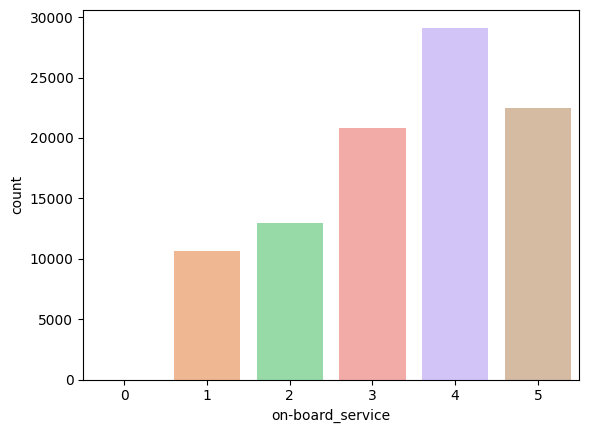

******************************
======seat_comfort======
seat_comfort
4    29957
5    25064
3    16844
2    13267
1    10979
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


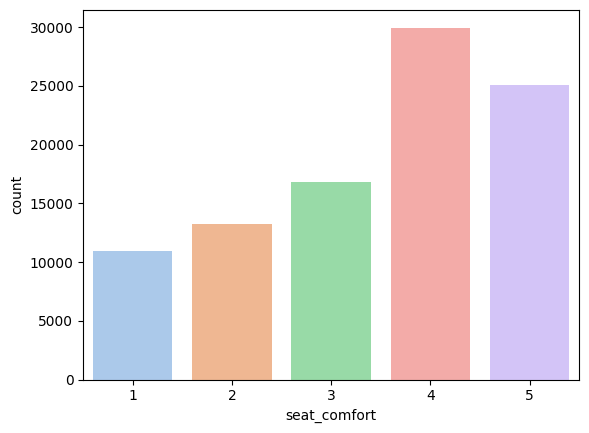

******************************
======leg_room_service======
leg_room_service
4    26470
5    23390
3    18242
2    18212
1     9313
0      484
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


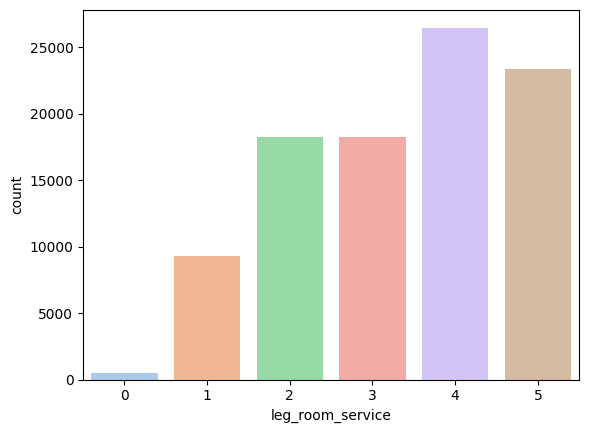

******************************
======cleanliness======
cleanliness
4    25416
3    22645
5    21467
2    14490
1    12085
0        8
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


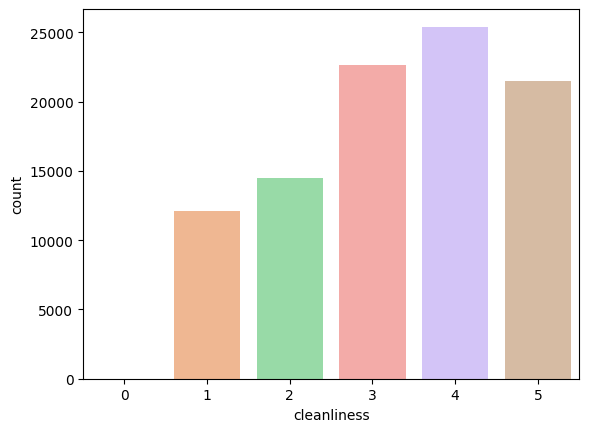

******************************
======food_and_drink======
food_and_drink
4    22992
5    21126
3    20357
2    20000
1    11594
0       42
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


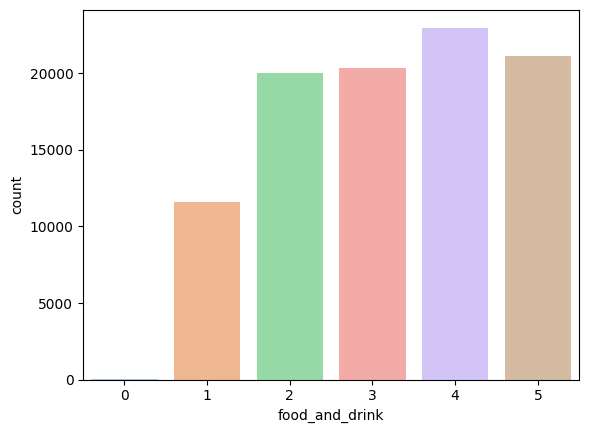

******************************
======in-flight_service======
in-flight_service
4    35416
5    26278
3    17791
2    10278
1     6343
0        5
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


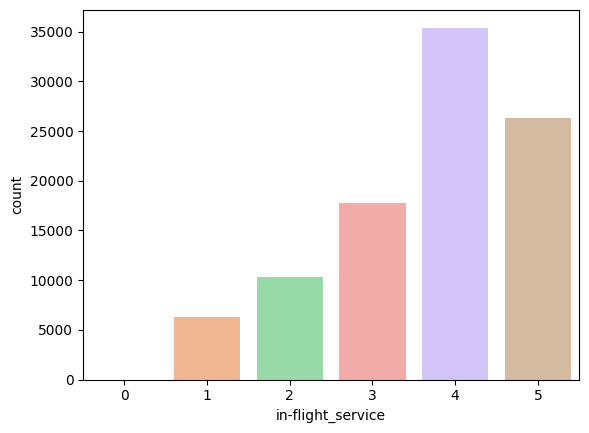

******************************
======in-flight_wifi_service======
in-flight_wifi_service
2    23402
3    23238
4    18869
1    16173
5    11228
0     3201
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


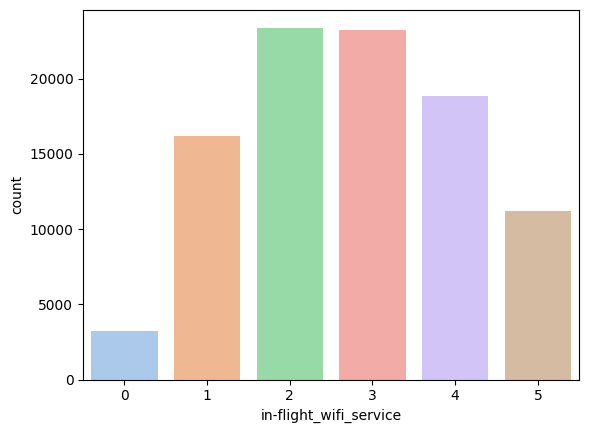

******************************
======in-flight_entertainment======
in-flight_entertainment
4    27770
5    24043
3    17085
2    15922
1    11278
0       13
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


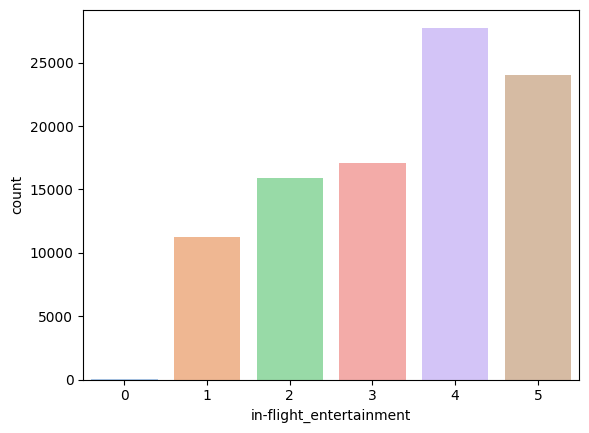

******************************
======baggage_handling======
baggage_handling
4    34715
5    25863
3    18321
2    10526
1     6686
Name: count, dtype: int64


/tmp/ipython-input-2487242584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


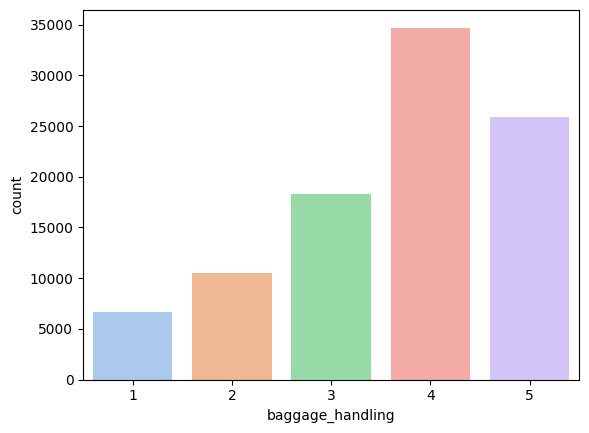

******************************


In [96]:
for col in service_cols:
    print(f"======{col}======")
    print(df[col].value_counts())
    sns.countplot(x=df[col], palette="pastel")
    plt.show()
    print("*"*30)

In [20]:
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96111 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   id                                      96111 non-null  int64   
 1   gender                                  96111 non-null  category
 2   age                                     96111 non-null  int64   
 3   customer_type                           96111 non-null  category
 4   type_of_travel                          96111 non-null  category
 5   class                                   96111 non-null  category
 6   flight_distance                         96111 non-null  int64   
 7   departure_delay                         96111 non-null  int64   
 8   arrival_delay                           96111 non-null  float64 
 9   departure_and_arrival_time_convenience  96111 non-null  int64   
 10  ease_of_online_booking                  96111 non-

# **Categorical vs Numerical features**

In [21]:
numerical_cols = df.select_dtypes(exclude=['category']).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']
Numerical Columns: ['id', 'age', 'flight_distance', 'departure_delay', 'arrival_delay', 'departure_and_arrival_time_convenience', 'ease_of_online_booking', 'check-in_service', 'online_boarding', 'gate_location', 'on-board_service', 'seat_comfort', 'leg_room_service', 'cleanliness', 'food_and_drink', 'in-flight_service', 'in-flight_wifi_service', 'in-flight_entertainment', 'baggage_handling']


# ***Target is*** `satisfaction`



/tmp/ipython-input-1935626222.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='satisfaction', palette='Set2')


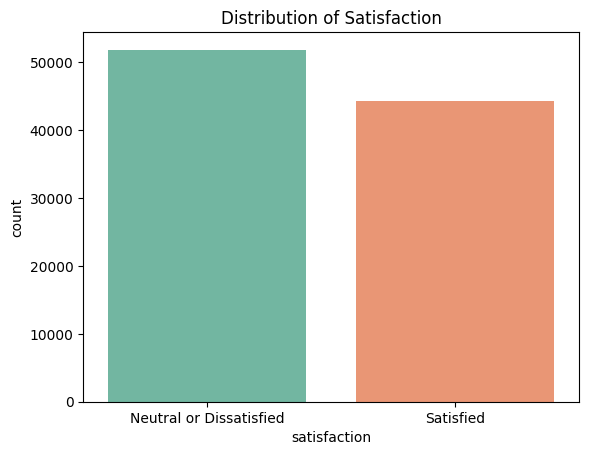

In [22]:
sns.countplot(data=df, x='satisfaction', palette='Set2')
plt.title("Distribution of Satisfaction")
plt.show()



---


---



# ***📌 Operational & Service Improvement***

---


---




## ***Travel Class & Customer Type vs Satisfaction***

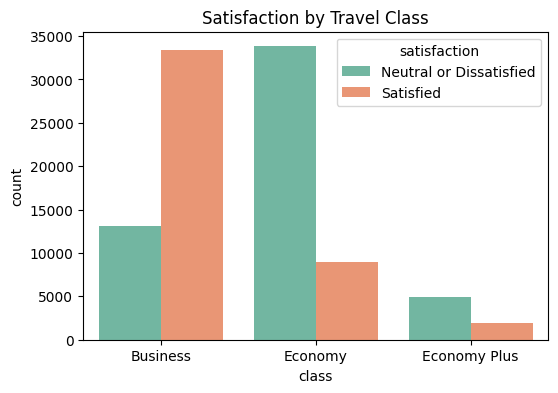

In [23]:
# Satisfaction by Travel Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='class', hue='satisfaction', palette='Set2')
plt.title("Satisfaction by Travel Class")
plt.show()

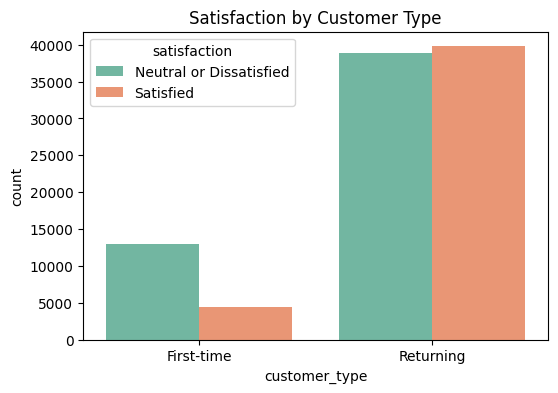

In [24]:
# Satisfaction by Customer Type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='customer_type', hue='satisfaction', palette='Set2')
plt.title("Satisfaction by Customer Type")
plt.show()

In [100]:
  # Crosstab to calculate satisfaction rates
print("Satisfaction Rate by Class:")
print(pd.crosstab(df['class'], df['satisfaction'], normalize='index')*100, "\n")

print("Satisfaction Rate by Customer Type:")
print(pd.crosstab(df['customer_type'], df['satisfaction'], normalize='index')*100)


Satisfaction Rate by Class:
satisfaction  Neutral or Dissatisfied  Satisfied
class                                           
Business                    28.172403  71.827597
Economy                     79.075153  20.924847
Economy Plus                72.212441  27.787559 

Satisfaction Rate by Customer Type:
satisfaction   Neutral or Dissatisfied  Satisfied
customer_type                                    
First-time                   74.205008  25.794992
Returning                    49.441888  50.558112


## ***Insights:***
* Business Class is the top performer with strong satisfaction. Economy and Economy Plus need major improvements in services to boost passenger satisfaction.
* Returning customers enjoy better experiences and show higher satisfaction, while first-time customers often face issues or unmet expectations. Improving the first-time passenger experience is key to turning them into loyal customers.

# ***In-flight Services Influence***

In [98]:
# Convert satisfaction to binary Classes (Satisfied=1, Dissatisfied=0)
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x=="satisfied" else 0)

/tmp/ipython-input-2334871901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service = df.groupby('satisfaction')[service_cols].mean().T


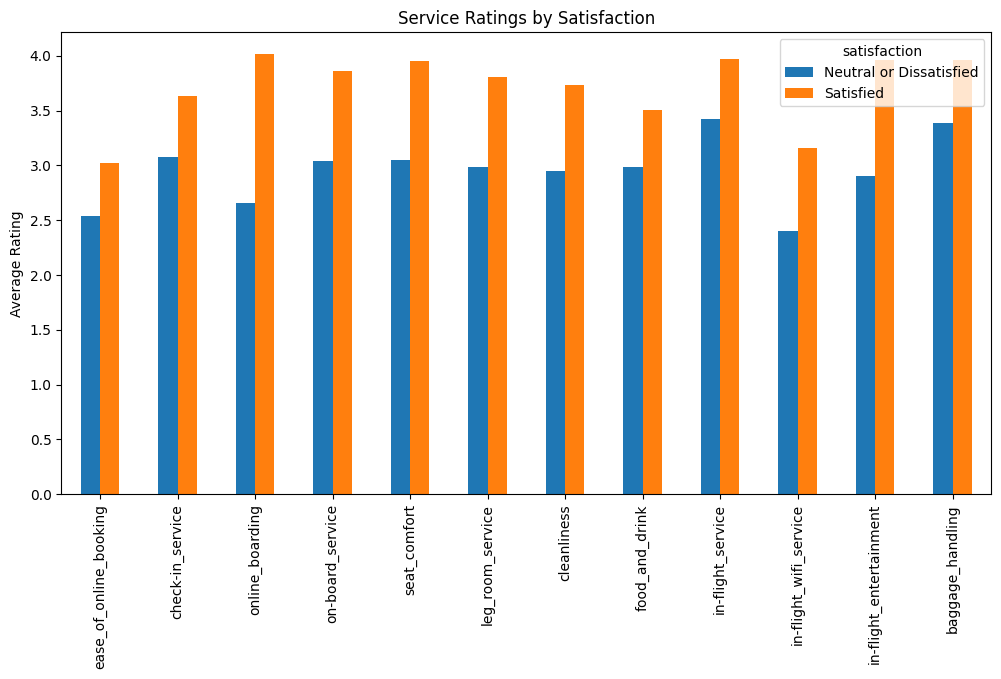

In [99]:
service = df.groupby('satisfaction')[service_cols].mean().T
service.plot(kind='bar', figsize=(12,6))
plt.title("Service Ratings by Satisfaction")
plt.ylabel("Average Rating")
plt.show()

In [28]:
# Calculate and print satisfaction rates for each service
for col in service_cols:
    print(f"Satisfaction Rate by {col}:")
    print(pd.crosstab(df[col], df['satisfaction'], normalize='index')*100, "\n")

Satisfaction Rate by ease_of_online_booking:
satisfaction            Neutral or Dissatisfied  Satisfied
ease_of_online_booking                                    
0                                     30.512648  69.487352
1                                     59.667438  40.332562
2                                     67.851447  32.148553
3                                     67.076840  32.923160
4                                     43.845482  56.154518
5                                     23.430228  76.569772 

Satisfaction Rate by check-in_service:
satisfaction      Neutral or Dissatisfied  Satisfied
check-in_service                                    
1                               73.134199  26.865801
2                               71.479579  28.520421
3                               51.817285  48.182715
4                               52.039381  47.960619
5                               37.904781  62.095219 

Satisfaction Rate by online_boarding:
satisfaction     Neutral or Dis

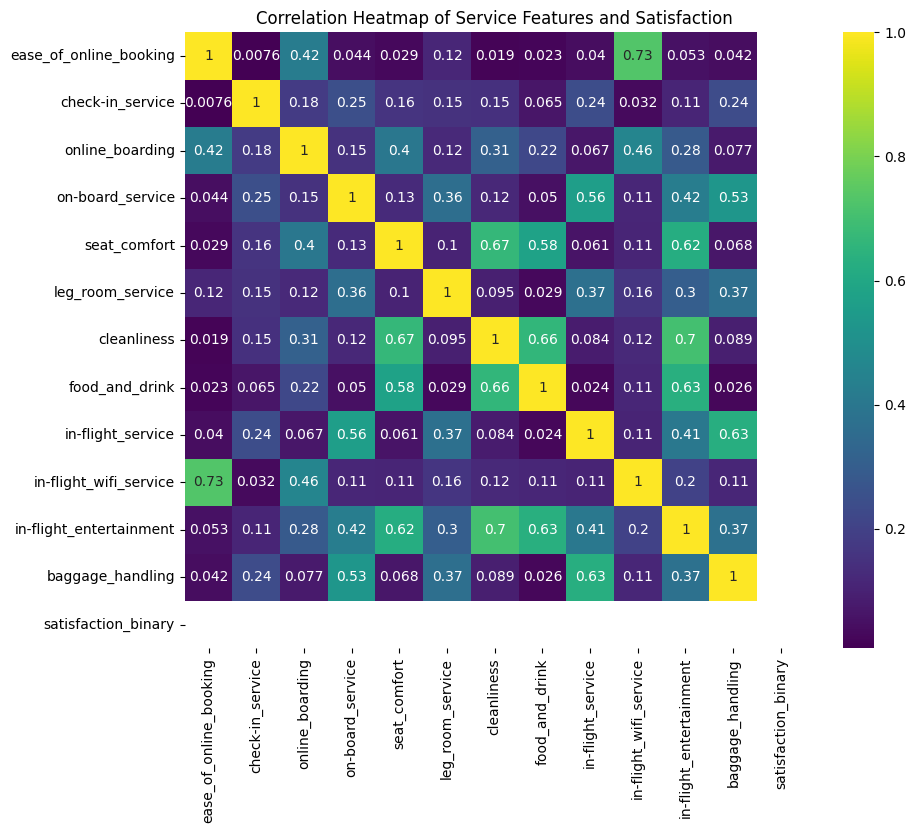

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[service_cols + ['satisfaction_binary']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Service Features and Satisfaction')
plt.show()


###  **Ease of Online Booking**

**Insight:** A smooth online booking process is a major driver of satisfaction.

---

###  **Check-in Service**

**Insight:** Efficient check-in significantly boosts satisfaction.

---

### **Online Boarding**
 **Insight:** Boarding experience is one of the most critical satisfaction drivers.

---

### **On-board Service**

 **Insight:** Passenger–crew interaction strongly influences overall satisfaction.

---

### **Seat Comfort**
**Insight:** Comfortable seating is highly correlated with satisfaction.

---

### **Leg Room Service**
**Insight:** Adequate leg room is important for passenger comfort and satisfaction.

---

###  **Cleanliness**

 **Insight:** Cabin cleanliness has a clear positive impact on satisfaction.

---

###  **Food and Drink**
**Insight:** Food matters, but not as strongly as services like boarding or seat comfort.

---

###  **In-flight Service**

 **Insight:** General in-flight service quality is a significant satisfaction factor.

---

###  **In-flight Wi-Fi Service**

 **Insight:** Wi-Fi is a top driver of satisfaction when working well, but causes frustration when poor.

---

###  **In-flight Entertainment**

**Insight:** Entertainment options are critical, especially for longer flights.

---

###  **Baggage Handling**

 **Insight:** Efficient baggage handling contributes to overall passenger satisfaction.

---

## **Overall Takeaways**

1. **Top drivers of satisfaction**:

   * Online boarding
   * In-flight Wi-Fi
   * Seat comfort
   * Entertainment
   * Cleanliness

2. **Moderate drivers**:

   * Check-in service
   * In-flight service
   * Baggage handling

3. **Lesser (but still important) drivers**:

   * Food & drink
   * Gate location (from earlier list, low impact)


# ***Delays Effect across Classes***

/tmp/ipython-input-2908638317.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='class', y='departure_delay', hue='satisfaction', ci=None);


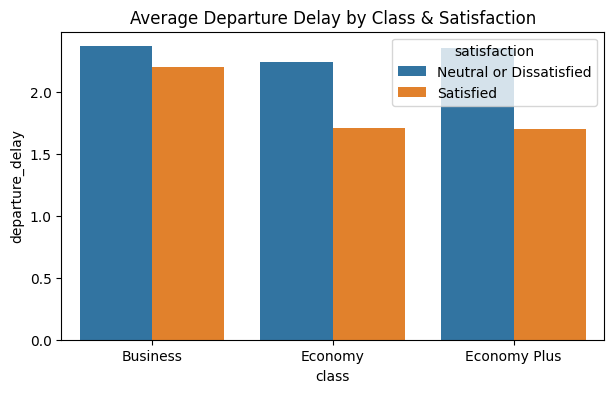

In [30]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='class', y='departure_delay', hue='satisfaction', ci=None);
plt.title("Average Departure Delay by Class & Satisfaction")
plt.show()


/tmp/ipython-input-209780046.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='class', y='arrival_delay', hue='satisfaction', ci=None)


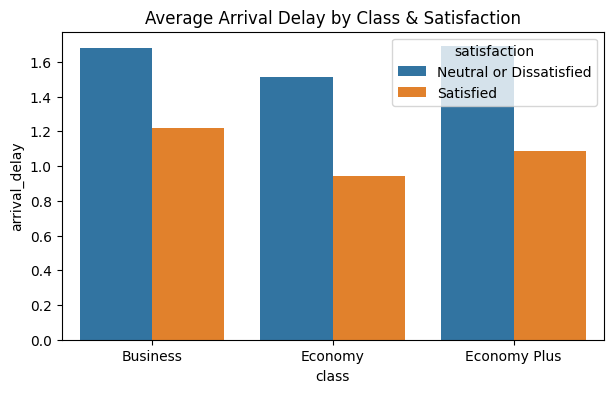

In [31]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='class', y='arrival_delay', hue='satisfaction', ci=None)
plt.title("Average Arrival Delay by Class & Satisfaction")
plt.show()

In [32]:
print("Average Delay by Satisfaction:")
print(df.groupby('satisfaction')[['departure_delay','arrival_delay']].mean())

Average Delay by Satisfaction:
                         departure_delay  arrival_delay
satisfaction                                           
Neutral or Dissatisfied         2.288999       1.571459
Satisfied                       2.085882       1.156788


/tmp/ipython-input-757752581.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('satisfaction')[['departure_delay','arrival_delay']].mean())


## ***Insights***
* On-time performance plays a role in satisfaction, even small reductions in delays can significantly improve passenger experience.

# ***Demographics (Age, Gender)***

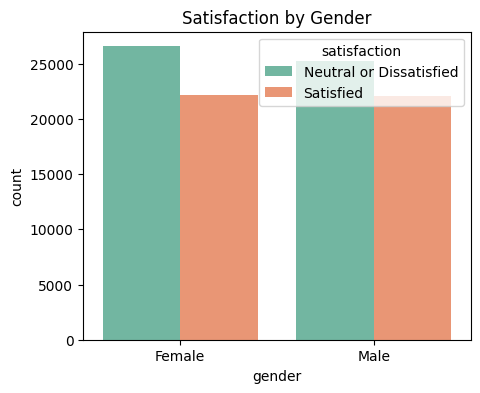

In [33]:
# Gender vs Satisfaction
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='gender', hue='satisfaction', palette='Set2')
plt.title("Satisfaction by Gender")
plt.show()

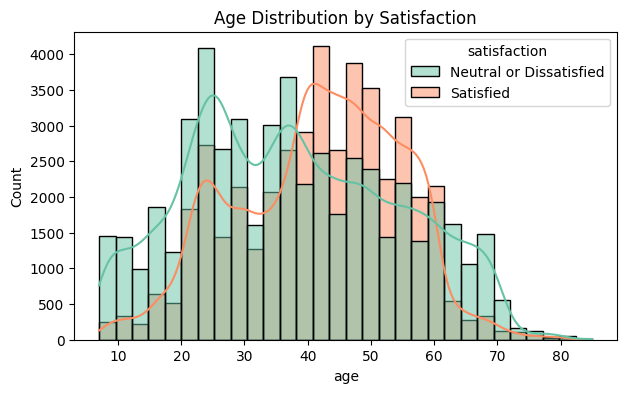

In [34]:
# Age distribution by satisfaction
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='age', hue='satisfaction', kde=True, bins=30, palette='Set2')
plt.title("Age Distribution by Satisfaction")
plt.show()


In [ ]:
# Gender vs satisfaction
gender_sat = pd.crosstab(df['gender'], df['satisfaction'], normalize='index')*100

### ***Working on groups of age:***

In [35]:
# Age groups vs satisfaction

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0,30,50,100], labels=['<30','30-50','50+'])
print("Satisfaction by Age Group:")
print(pd.crosstab(df['age_group'], df['satisfaction'], normalize='index')*100)

Satisfaction by Age Group:
satisfaction  Neutral or Dissatisfied  Satisfied
age_group                                       
<30                         66.349576  33.650424
30-50                       46.586581  53.413419
50+                         51.068155  48.931845


## ***Insight:***

* Satisfaction levels are very similar between genders, with males slightly more satisfied than females, but the difference is minor.

* Gender does not appear to have a significant impact on overall satisfaction.

* Younger passengers (< 30) are the least satisfied, with only ~34% satisfied.

* Middle-aged passengers (30–50) are the most satisfied, with ~53% satisfied.

* Older passengers (50+) are moderately satisfied (~49%).

* Satisfaction seems to vary more by age than by gender.

* Airlines might need to focus on improving services targeted at younger passengers, possibly enhancing digital experience, comfort, or entertainment.

# ***Flight Distance VS Type of Travel***

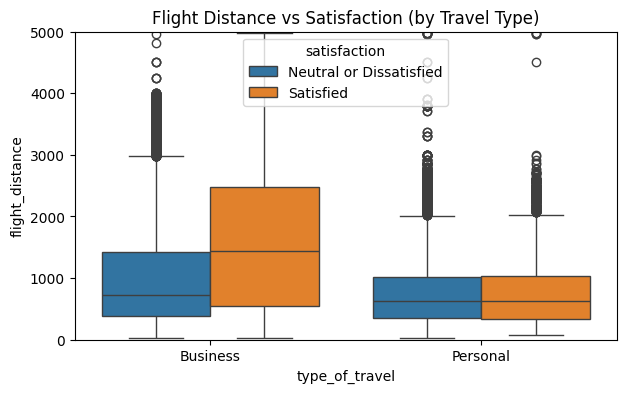

In [105]:
# Boxplot
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='type_of_travel', y='flight_distance', hue='satisfaction')
plt.title("Flight Distance vs Satisfaction (by Travel Type)")
plt.ylim(0, 5000)
plt.show()


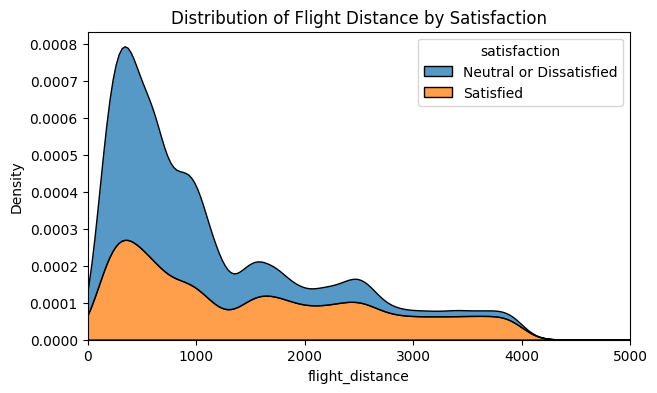

In [106]:

# KDE plot
plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='flight_distance', hue='satisfaction', multiple='stack')
plt.title("Distribution of Flight Distance by Satisfaction")
plt.xlim(0, 5000)
plt.show()



In [108]:
print("Average Flight Distance by Travel Type and Satisfaction:")
print(df.groupby(['type_of_travel','satisfaction'])['flight_distance'].mean().unstack())

Average Flight Distance by Travel Type and Satisfaction:
satisfaction    Neutral or Dissatisfied    Satisfied
type_of_travel                                      
Business                    1047.535858  1580.752085
Personal                     788.767388   794.846536


/tmp/ipython-input-2852681507.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['type_of_travel','satisfaction'])['flight_distance'].mean().unstack())


## ***Insight:***

* Flight distance influences satisfaction mainly for business travelers, possibly due to better services or amenities on longer flights.

* For personal travelers, satisfaction depends more on service quality rather than distance.



---



---

# ***📊 Customer Loyalty & Marketing***

---



---



## ***Which factors correlate most with satisfaction for loyal customers?***

### **One hot encoding for some columns to make it able to applt correlation with `satisfaction`**

In [48]:
loyal = df[df['customer_type'] == 'Returning']

# Convert categorical features into dummy variables
loyal = pd.get_dummies(loyal, columns=['type_of_travel','class'], drop_first=True)

# Convert satisfaction to binary (Satisfied=1, Dissatisfied/Neutral=0)
loyal['satisfaction_binary'] = loyal['satisfaction'].apply(lambda x: 1 if x=='Satisfied' else 0)

# Drop unnecessary columns (Because we have new dummy variables from these columns)
loyal = loyal.drop(columns=['id','satisfaction','gender','customer_type','age_group'])

# Correlation with satisfaction
corr = loyal.corr()['satisfaction_binary'].sort_values(ascending=False)
corr

,satisfaction_binary
satisfaction_binary,1.000000
online_boarding,0.497001
in-flight_entertainment,0.460481
seat_comfort,0.387201
leg_room_service,0.357589
cleanliness,0.346904
on-board_service,0.337467
flight_distance,0.294677
baggage_handling,0.258687
in-flight_wifi_service,0.257229


## **insights:**

* *Key factors of Satisfaction*: **Online boarding, in-flight entertainment, comfort, cleanliness, and crew service**.

* *Secondary factors*: **Wi-Fi, baggage handling, check-in, food & drink**.

* *Weak factors*: **Online booking ease, age, gate location**.

* *Negative factors*: **Time convenience and delays, reducing these can improve satisfaction**.

# ***loyalty VS satisfaction, services drive the loyalty***




In [53]:
satisfaction_by_loyalty = pd.crosstab(df['customer_type'], df['satisfaction'], normalize='index')*100
satisfaction_by_loyalty


satisfaction,Neutral or Dissatisfied,Satisfied
customer_type,,
First-time,74.205008,25.794992
Returning,49.441888,50.558112


/tmp/ipython-input-2735767270.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_by_loyalty.reset_index(), x='customer_type', y='Satisfied', palette='pastel')


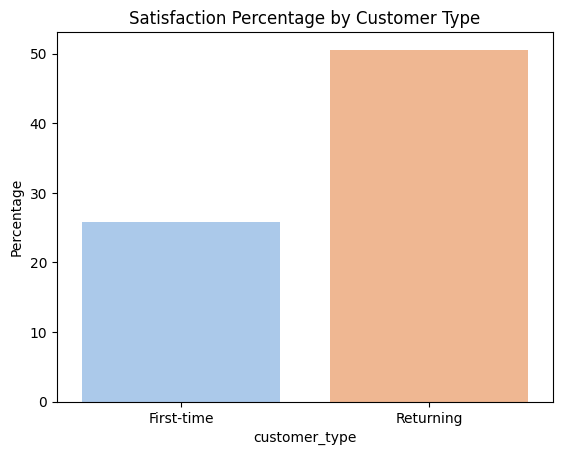

In [57]:
sns.barplot(data=satisfaction_by_loyalty.reset_index(), x='customer_type', y='Satisfied', palette='pastel')
plt.title("Satisfaction Percentage by Customer Type")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

In [61]:
services = ['ease_of_online_booking','check-in_service','online_boarding','on-board_service',
            'seat_comfort','leg_room_service','cleanliness','food_and_drink',
            'in-flight_service','in-flight_wifi_service','in-flight_entertainment','baggage_handling']

In [60]:
customer_type_service_means = df.groupby('customer_type')[services].mean().T
customer_type_service_means

/tmp/ipython-input-873341310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_type_service_means = df.groupby('customer_type')[services].mean().T


customer_type,First-time,Returning
ease_of_online_booking,2.719647,2.772369
check-in_service,3.279264,3.342813
online_boarding,2.722856,3.408109
on-board_service,3.275712,3.446197
seat_comfort,3.004125,3.569402
leg_room_service,3.225233,3.394480
cleanliness,3.062453,3.363294
food_and_drink,3.056953,3.266165
in-flight_service,3.741821,3.661675
in-flight_wifi_service,2.730075,2.754443


## **insights:**
*   Loyal (returning) customers show higher satisfaction rates (~ 50%)
compared to first-time customers(~ 26%).

* Indicating that repeated travel is associated with higher satisfaction First-time customers are generally less satisfied, likely due to limited experience or unmet expectations.

* Online boarding, seat comfort, in-flight entertainment, on-board service, and cleanliness are the key services driving satisfaction and loyalty.



# ***Business travelers with services***

In [94]:
type_of_travel_service_means = df.groupby('type_of_travel')[services].mean().T
type_of_travel_service_means


/tmp/ipython-input-1130503861.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_of_travel_service_means = df.groupby('type_of_travel')[services].mean().T


type_of_travel,Business,Personal
ease_of_online_booking,2.882825,2.496703
check-in_service,3.323233,3.349098
online_boarding,3.496256,2.812397
on-board_service,3.481278,3.268836
seat_comfort,3.590014,3.193493
leg_room_service,3.500966,3.059544
cleanliness,3.392593,3.122603
food_and_drink,3.290863,3.089199
in-flight_service,3.706329,3.609499
in-flight_wifi_service,2.842875,2.544164


## **Insights:**
* Business travelers care more about convenience, comfort, and entertainment.

* Airlines targeting business passengers should prioritize online boarding.

# ***high service ratings ( ≥4 or 5) VS satisfaction***

In [73]:
df['high_ratings'] = (df[services] >= 4).sum(axis=1)
high_rating_relation = df.groupby('satisfaction')['high_ratings'].mean()

print("Average Number of High Service Ratings by Satisfaction:")
high_rating_relation


Average Number of High Service Ratings by Satisfaction:


/tmp/ipython-input-1931830160.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_rating_relation = df.groupby('satisfaction')['high_ratings'].mean()


,high_ratings
satisfaction,
Neutral or Dissatisfied,4.314307
Satisfied,8.025751


/tmp/ipython-input-388946188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_rating_relation.index, y=high_rating_relation.values, palette='Set2')


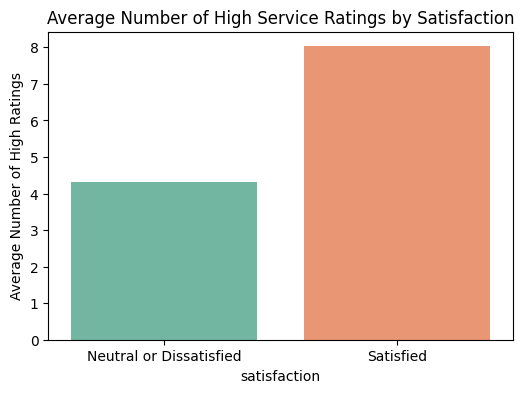

In [72]:
plt.figure(figsize=(6, 4))
sns.barplot(x=high_rating_relation.index, y=high_rating_relation.values, palette='Set2')
plt.title("Average Number of High Service Ratings by Satisfaction")
plt.ylabel("Average Number of High Ratings")
plt.show()


# ***Insights:***
* Passengers who are satisfied give almost twice as many high ratings across
services compared to those who are neutral or dissatisfied.

***Encouraging passengers to have consistently high experiences across multiple services (seat comfort, online boarding, entertainment, etc.) will likely increase overall satisfaction.***


# ***Flight Distance VS Satisfaction***

In [75]:
df['flight_distance'].max(), df['flight_distance'].min()

(4983, 31)

In [103]:
bins = [df['flight_distance'].min(), 1000, 3000, df['flight_distance'].max()]
df['flight_distance_bin'] = pd.cut(df['flight_distance'], bins=bins, labels = ['Short', 'Medium', 'Long'])

distance_satisfaction = df.groupby(['flight_distance_bin'])['satisfaction'].value_counts().unstack()
distance_satisfaction


/tmp/ipython-input-3516487466.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_satisfaction = df.groupby(['flight_distance_bin'])['satisfaction'].value_counts().unstack()


satisfaction,Neutral or Dissatisfied,Satisfied
flight_distance_bin,,
Short,35687,19728
Medium,14633,18357
Long,1516,6181


/tmp/ipython-input-3353292918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_satisfaction.index, y=distance_satisfaction['Satisfied'], palette='viridis')


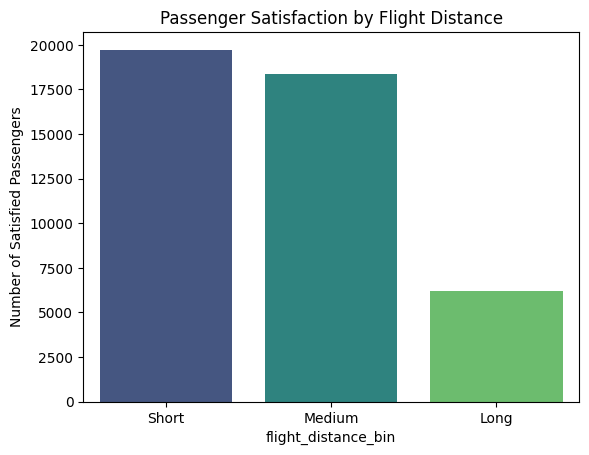

In [104]:
sns.barplot(x=distance_satisfaction.index, y=distance_satisfaction['Satisfied'], palette='viridis')
plt.ylabel('Number of Satisfied Passengers')
plt.title('Passenger Satisfaction by Flight Distance')
plt.show()

# ***Insight***
* Satisfaction increases with flight distance.
* Possible reasons: Better service on medium/long flights (entertainment, meals, comfort) and more time to use amenities.


---

#🧠 ***Recommendations***

#### **Improve Economy & Economy Plus Experienc**e

* Enhance basic services (online boarding, seat comfort, leg room, cleanliness).
* **How:**

  * Faster, smoother boarding.
  * Improve seat comfort & leg room for long flights.
  * Maintain cabin cleanliness and food quality.
* **Goal:** Increase passenger satisfaction and convert to loyal customers.

#### **Enhance First-Time Passenger Experience**

* Reduce friction for first-time travelers.
* **How:**

  * Provide digital guides or videos explaining the journey.
  * Offer responsive customer support for inquiries or issues.
* **Goal:** Improve satisfaction (\~26% → higher) and loyalty.

#### **Focus on Top Service Drivers**

* **Online Boarding:** Smooth, fast, with priority notifications.
* **In-flight Wi-Fi & Entertainment:** Stable Wi-Fi and diverse entertainment, especially for long flights.
* **Seat Comfort & Cleanliness:** Maintain and improve.
* **On-board Service:** Train crew for friendly, efficient interactions.

#### **Moderate & Lesser Drivers**

* **Check-in, In-flight Service, Baggage Handling:** Optimize efficiency.
* **Food & Drink:** Improve quality, especially on long flights.
* **Gate Location:** Reduce waiting time for connecting flights.

#### **Minimize Delays**

* Reduce departure/arrival delays, especially for business travelers.
* Provide timely notifications to reduce negative perception.

#### **Age-Specific Strategies**

* **<30 years:** Enhance digital experience, Wi-Fi, comfort, entertainment.
* **30–50 years:** Maintain high satisfaction with quality service.
* **50+ years:** Provide extra support (boarding assistance, luggage help).

#### **Enhance Loyalty Programs**

* Offer attractive rewards: points, seat upgrades, perks on long flights.
* Use loyal customers’ feedback to improve services.

#### **Business Travelers**

* Focus on **convenience, comfort, and entertainment**.
* Ensure seamless experience from booking to arrival.

#### **Flight Distance Consideration**

* Offer premium services on medium/long flights (entertainment, meals, comfort).
* Monitor satisfaction on short flights; improve essential services.

---
